<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering Overview

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. In data science, it's particularly useful for understanding the structure of data and identifying meaningful groups or patterns. The process can be either **agglomerative (bottom-up)** or **divisive (top-down)**.

## Agglomerative Hierarchical Clustering
- **Start:** Treat each data point as a single cluster.
- **Linkage:** Compute the proximity between clusters.
- **Merge:** Combine the closest pairs of clusters into one cluster.
- **Repeat:** Continue the process until all data points are clustered into a single cluster.

## Divisive Hierarchical Clustering
- **Start:** Treat all data points as one cluster.
- **Split:** Divide the cluster into smaller clusters.
- **Recursion:** Continue dividing each cluster into smaller clusters.
- **Stop:** The process stops when each data point is a single cluster or a stopping criterion is met.

## Key Concepts
- **Dendrogram:** A tree-like diagram that records the sequences of merges or splits.
- **Linkage Criteria:** Determines the distance between clusters. Common methods include single linkage, complete linkage, average linkage, and Ward’s method.
- **Stopping Criteria:** Determines when to stop the algorithm, which might be a specified number of clusters or a threshold distance.

## Application to IMDB Dataset
We can apply hierarchical clustering to the `IMDB.csv` dataset from your knowledge source. I will guide you through the process step-by-step, assuming this dataset contains movie-related features (like genres, ratings, etc.).

### Data Preprocessing
1. Load the dataset, handle missing values, and normalize the data if needed.
2. Choose relevant features for clustering.

### Hierarchical Clustering
- Apply hierarchical clustering and generate the dendrogram.

### Interpretation
- Analyze the dendrogram to choose the number of clusters and interpret the clusters.

## Loading the Dataset
Let's start by loading the dataset and exploring it to determine the appropriate features for clustering. We will proceed with the necessary preprocessing steps and then apply hierarchical clustering.

First, we need to load and explore the dataset.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/IMDB.csv'  # Update the path if different
imdb_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(imdb_data.head())

                  Name       Year Episodes   Type  Rating  \
0      1. Breaking Bad  2008–2013   62 eps  TV-MA     9.5   
1   2. Planet Earth II       2016    6 eps   TV-G     9.5   
2      3. Planet Earth       2006   11 eps  TV-PG     9.4   
3  4. Band of Brothers       2001   10 eps  TV-MA     9.4   
4         5. Chernobyl       2019    5 eps  TV-MA     9.4   

                                           Image-src  \
0  https://m.media-amazon.com/images/M/MV5BYmQ4YW...   
1  https://m.media-amazon.com/images/M/MV5BMGZmYm...   
2  https://m.media-amazon.com/images/M/MV5BMzMyYj...   
3  https://m.media-amazon.com/images/M/MV5BMTI3OD...   
4  https://m.media-amazon.com/images/M/MV5BNTdkN2...   

                                         Description  \
0  A chemistry teacher diagnosed with inoperable ...   
1  David Attenborough returns with a new wildlife...   
2  A documentary series on the wildlife found on ...   
3  The story of Easy Company of the U.S. Army 101...   
4  In April 1986

# Hierarchical Clustering with IMDB.csv Dataset

Based on the provided data structure from the `IMDB.csv` dataset, we have several features that can be considered for hierarchical clustering. The features include:

- **Name:** Title of the TV series or movie.
- **Year:** Release year or the period of airing.
- **Episodes:** Number of episodes.
- **Type:** Content rating (e.g., TV-MA, TV-G, TV-PG).
- **Rating:** IMDB rating.
- **Description:** Brief description of the series or movie.

For hierarchical clustering, numerical features often provide more meaningful results. In this dataset, the **Rating** and possibly the **Episodes** (after extracting numerical values) could be useful. However, the **Description** could be employed for text clustering, but that requires more advanced techniques like NLP (Natural Language Processing).

## Suggested Approach

### Data Preprocessing
1. Extract numerical values from the **Episodes** column.
2. Normalize **Rating** and **Episodes** for clustering.

### Hierarchical Clustering
- Use **Rating** and **Episodes** for clustering.
- Generate a dendrogram to visualize the hierarchy of clusters.

### Analysis
- Decide on the number of clusters based on the dendrogram.
- Analyze the characteristics of each cluster.

## Starting with Data Preprocessing
Let's start with the data preprocessing step:

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
imdb_data = pd.read_csv('/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/IMDB.csv')

# Extract numerical values from 'Episodes'
imdb_data['Episodes'] = imdb_data['Episodes'].str.extract('(\d+)').astype(float)

# Replace missing values with the mean (or median)
imdb_data['Episodes'].fillna(imdb_data['Episodes'].mean(), inplace=True)

# Normalize the features
scaler = StandardScaler()
imdb_data[['Rating', 'Episodes']] = scaler.fit_transform(imdb_data[['Rating', 'Episodes']])

# Display the preprocessed data
print(imdb_data[['Name', 'Rating', 'Episodes']].head())

                  Name    Rating  Episodes
0      1. Breaking Bad  3.206767 -0.100800
1   2. Planet Earth II  3.206767 -0.599104
2      3. Planet Earth  2.772010 -0.554612
3  4. Band of Brothers  2.772010 -0.563511
4         5. Chernobyl  2.772010 -0.608002


# Performing Hierarchical Clustering

Now that the data is preprocessed and ready, we'll proceed with the following steps to perform hierarchical clustering using the `scipy.cluster.hierarchy` module.

## Perform Hierarchical Clustering

- We'll use the `scipy.cluster.hierarchy` module to perform the clustering and generate a dendrogram.
- The linkage method defines how the distance between clusters is measured. Common methods are `ward`, `single`, `complete`, and `average`.
- We can start with the `ward` method as it minimizes the variance within each cluster.

## Generate a Dendrogram

- A dendrogram is a tree-like diagram that shows the arrangement of the clusters produced by the hierarchical clustering.
- It helps in deciding the number of clusters by visualizing the point where cluster merges significantly increase.

## Hierarchical Clustering Code

Here is the code to perform hierarchical clustering and generate a dendrogram:

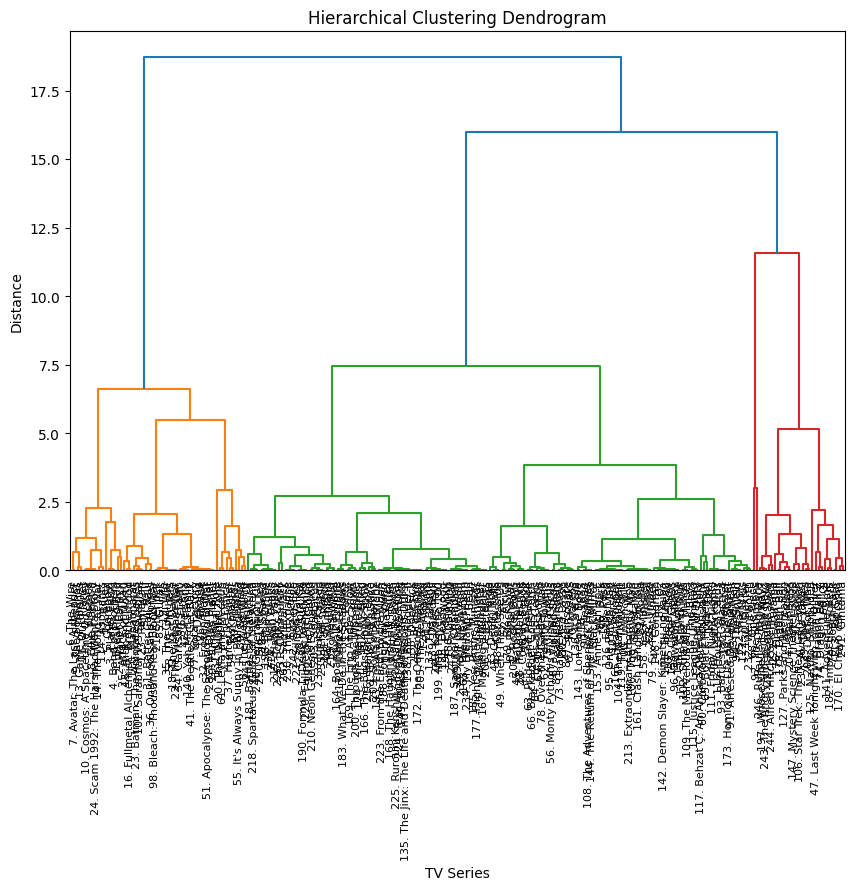

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(imdb_data[['Rating', 'Episodes']], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=imdb_data['Name'].values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("TV Series")
plt.ylabel("Distance")
plt.show()

In this dendrogram:

- Each vertical line represents a TV series.
- The height of the horizontal lines (on the y-axis) indicates the distance or dissimilarity between clusters.
- Clusters are merged at different levels of distance, which is visualized by the joining of the vertical lines.
- To determine the number of clusters, you would typically look for the largest vertical distance that doesn't cross any horizontal lines and draw a horizontal line across the dendrogram at that point. The number of vertical lines this horizontal line crosses represents the number of clusters.

Analyzing this dendrogram should provide insights into how the TV series are grouped based on their ratings and number of episodes.